In [1]:
!pip install pandas numpy matplotlib scikit-learn


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error


In [3]:
data = pd.DataFrame({
    'Study_Hours': [2, 3, 5, 7, 8, 1, 4, 6, 9, 10],
    'Attendance_Percentage': [60, 65, 75, 80, 85, 55, 70, 78, 90, 95],
    'Assignment_Score': [50, 55, 65, 70, 75, 45, 60, 68, 85, 90],
    'Previous_Test_Score': [52, 58, 67, 72, 78, 48, 62, 70, 88, 92],
    'Final_Score': [55, 60, 70, 75, 82, 50, 65, 73, 90, 95]
})

data


,Study_Hours,Attendance_Percentage,Assignment_Score,Previous_Test_Score,Final_Score
0,2,60,50,52,55
1,3,65,55,58,60
2,5,75,65,67,70
3,7,80,70,72,75
4,8,85,75,78,82
5,1,55,45,48,50
6,4,70,60,62,65
7,6,78,68,70,73
8,9,90,85,88,90
9,10,95,90,92,95


In [4]:
X = data[['Study_Hours', 'Attendance_Percentage', 
          'Assignment_Score', 'Previous_Test_Score']]

y = data['Final_Score']

X.head()


,Study_Hours,Attendance_Percentage,Assignment_Score,Previous_Test_Score
0,2,60,50,52
1,3,65,55,58
2,5,75,65,67
3,7,80,70,72
4,8,85,75,78


In [5]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Training data size:", X_train.shape)
print("Testing data size:", X_test.shape)


Training data size: (8, 4)
Testing data size: (2, 4)


In [6]:
model = LinearRegression()
model.fit(X_train, y_train)

print("Model training completed")


Model training completed


In [7]:
y_pred = model.predict(X_test)

print("Predicted Scores:")
print(y_pred)


Predicted Scores:
[90.91271478 60.82268041]


In [8]:
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("Mean Absolute Error (MAE):", mae)
print("Root Mean Squared Error (RMSE):", rmse)


Mean Absolute Error (MAE): 0.8676975945017134
Root Mean Squared Error (RMSE): 0.8688645821939339


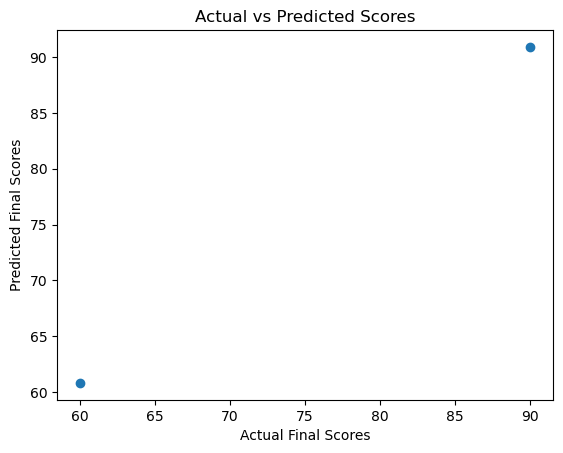

In [9]:
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Final Scores")
plt.ylabel("Predicted Final Scores")
plt.title("Actual vs Predicted Scores")
plt.show()



In [10]:
data = None


In [11]:
np.random.seed(42)

rows = 500

study_hours = np.random.randint(1, 11, rows)
attendance = np.random.randint(50, 101, rows)
assignment_score = np.random.randint(40, 101, rows)
previous_test_score = np.random.randint(40, 101, rows)

# Realistic weighted formula + small noise
final_score = (
    0.4 * study_hours * 10 +
    0.3 * attendance +
    0.2 * assignment_score +
    0.1 * previous_test_score +
    np.random.normal(0, 5, rows)   # noise
)

data = pd.DataFrame({
    'Study_Hours': study_hours,
    'Attendance_Percentage': attendance,
    'Assignment_Score': assignment_score,
    'Previous_Test_Score': previous_test_score,
    'Final_Score': final_score
})

data.head()


,Study_Hours,Attendance_Percentage,Assignment_Score,Previous_Test_Score,Final_Score
0,7,90,88,56,80.727509
1,4,79,44,98,58.155376
2,8,66,99,84,81.348347
3,5,98,83,82,73.049718
4,7,69,89,73,77.338578


In [12]:
X = data[['Study_Hours', 'Attendance_Percentage', 
          'Assignment_Score', 'Previous_Test_Score']]

y = data['Final_Score']

print("Dataset shape:", data.shape)


Dataset shape: (500, 5)


In [13]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Training data size:", X_train.shape)
print("Testing data size:", X_test.shape)


Training data size: (400, 4)
Testing data size: (100, 4)


In [14]:
lin_model = LinearRegression()
lin_model.fit(X_train, y_train)

print("Linear Regression training completed")


Linear Regression training completed


In [15]:
y_pred_lin = lin_model.predict(X_test)

print("First 5 Predictions:")
print(y_pred_lin[:5])


First 5 Predictions:
[86.12205546 64.98792399 71.93173054 66.52259245 80.75695689]


In [16]:
mae_lin = mean_absolute_error(y_test, y_pred_lin)
rmse_lin = np.sqrt(mean_squared_error(y_test, y_pred_lin))

print("Linear Regression MAE:", mae_lin)
print("Linear Regression RMSE:", rmse_lin)


Linear Regression MAE: 3.931355347803795
Linear Regression RMSE: 4.717879681471767


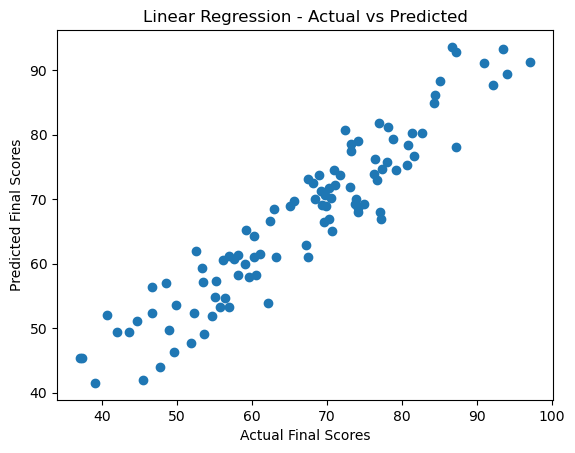

In [17]:
plt.figure()
plt.scatter(y_test, y_pred_lin)
plt.xlabel("Actual Final Scores")
plt.ylabel("Predicted Final Scores")
plt.title("Linear Regression - Actual vs Predicted")
plt.show()


In [18]:
from sklearn.ensemble import RandomForestRegressor


In [19]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

print("Random Forest training completed")


Random Forest training completed


In [20]:
y_pred_rf = rf_model.predict(X_test)

print("First 5 Random Forest Predictions:")
print(y_pred_rf[:5])


First 5 Random Forest Predictions:
[85.43252863 63.70793582 70.05066414 65.67049831 78.69597256]


In [21]:
mae_rf = mean_absolute_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))

print("Random Forest MAE:", mae_rf)
print("Random Forest RMSE:", rmse_rf)


Random Forest MAE: 4.4329300091575865
Random Forest RMSE: 5.497829273108657
